Mounted at /content/drive
Found 150 images belonging to 3 classes.
Found 150 images belonging to 3 classes.
Epoch 1/10
4/4 [==============================] - 73s 20s/step - loss: 0.6030 - accuracy: 0.7712 - val_loss: 0.1073 - val_accuracy: 1.0000
Epoch 2/10
4/4 [==============================] - 52s 15s/step - loss: 0.0520 - accuracy: 1.0000 - val_loss: 0.0248 - val_accuracy: 1.0000
Epoch 3/10
4/4 [==============================] - 60s 19s/step - loss: 0.0171 - accuracy: 1.0000 - val_loss: 0.0279 - val_accuracy: 1.0000
Epoch 4/10
4/4 [==============================] - 40s 12s/step - loss: 0.0092 - accuracy: 1.0000 - val_loss: 0.0118 - val_accuracy: 1.0000
Epoch 5/10
4/4 [==============================] - 60s 18s/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0044 - val_accuracy: 1.0000
Epoch 6/10
4/4 [==============================] - 40s 11s/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 7/10
4/4 [==============================] - 43s 12s/

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


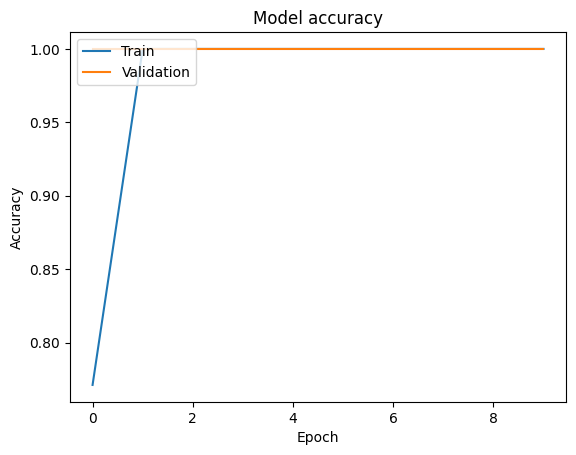

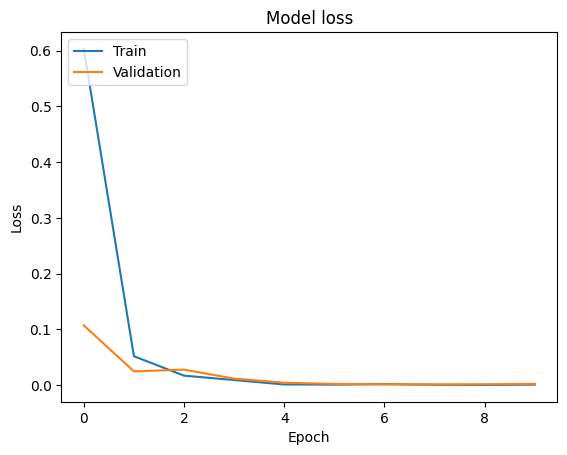

In [2]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

train_dir = '/content/drive/MyDrive/Adv prog/train'
validation_dir = '/content/drive/MyDrive/Adv prog/validation'

batch_size = 32
image_size = (224, 224)

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

base_model = MobileNetV2(input_shape=(224, 224, 3),
                         include_top=False,
                         weights='imagenet')

for layer in base_model.layers:
    layer.trainable = False

x = GlobalAveragePooling2D()(base_model.output)
x = Dense(128, activation='relu')(x)
predictions = Dense(len(train_generator.class_indices), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer=tf.keras.optimizers.legacy.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

loss, accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print("Validation Loss:", loss)
print("Validation Accuracy:", accuracy)

model.save("my_model.h5")

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
